In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from math import pi

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Loading data set - already cleaned

df = pd.read_excel('./Dataset/Dataset-FIFA-21-cleaned.xlsx')

df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value (€),Wage (€),Special,...,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,227813,Oleksandr Zinchenko,23,Ukraine,80,85,Manchester City,29500000,95000,2144,...,59.0,76.0,78.0,79.0,76.0,15,11,13,11,11
1,239818,Rúben Santos Gato Alves Dias,23,Portugal,84,89,Manchester City,57500000,135000,1801,...,45.0,81.0,87.0,87.0,83.0,7,8,13,7,12
2,237692,Phil Foden,20,England,82,92,Manchester City,67000000,105000,2028,...,64.0,81.0,58.0,59.0,47.0,8,15,6,10,13
3,204485,Riyad Mahrez,29,Algeria,85,85,Manchester City,53000000,210000,2035,...,70.0,84.0,45.0,31.0,22.0,15,9,13,11,6
4,12265,Owen Hargreaves,30,England,78,78,Manchester City,3000000,30000,2106,...,72.0,NaN,NaN,78.0,75.0,14,9,12,15,12


#### Top 5 Countries have the highest number of players among number of available countries

In [3]:
print('Total Number Of Countries: {0}'.format(df['Nationality'].nunique()))

print(df['Nationality'].value_counts().head(5))

print('--'*40)

print("\n{0} have the most players".format(df['Nationality'].value_counts().index[0]))

Total Number Of Countries: 51
England        49
France         44
Netherlands    26
Germany        25
Argentina      25
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

England have the most players


Thus, European Countries have the most players

#### Top 5 Clubs have the highest number of players among number of available clubs

In [4]:
print('Total Number Of Clubs: {0}'.format(df['Club'].nunique()))

print(df['Club'].value_counts().head(5))

print('--'*40)

print("\n{0} has the most players".format(df['Club'].value_counts().index[0]))

Total Number Of Clubs: 105
Manchester City        25
Real Madrid            15
Paris Saint-Germain    14
Manchester United      14
FC Barcelona           13
Name: Club, dtype: int64
--------------------------------------------------------------------------------

Manchester City has the most players


#### Top 5 the most expensive Clubs

In [5]:
print(df.groupby(['Club'])['Value (€)'].sum().sort_values(ascending = False).head(5))

print('--'*40)

print("\n{0} is the most expensive club".format(df.groupby(['Club'])['Value (€)'].sum().sort_values(ascending = False).index[0]))

Club
Manchester City        1195970000
FC Bayern München       779100000
Paris Saint-Germain     764700000
Real Madrid             681700000
Manchester United       597300000
Name: Value (€), dtype: int64
--------------------------------------------------------------------------------

Manchester City is the most expensive club


#### Top 5 the most least Clubs

In [6]:
print(df.groupby(['Club'])['Value (€)'].sum().sort_values(ascending = True).head(5))

print('--'*40)

print("\n{0} is the most least club".format(df.groupby(['Club'])['Value (€)'].sum().sort_values(ascending = True).index[0]))

Club
Celtic                     1200000
Bayern München II          1200000
Tigres U.A.N.L.            1600000
Estudiantes de La Plata    1800000
FC St. Gallen              2400000
Name: Value (€), dtype: int64
--------------------------------------------------------------------------------

Celtic is the most least club


#### Top 5 Clubs with the best player

In [7]:
print(df.groupby(['Club'])['Overall'].max().sort_values(ascending = False).head(5))

Club
FC Barcelona           93
Juventus               92
FC Bayern München      92
Manchester City        91
Paris Saint-Germain    91
Name: Overall, dtype: int64


#### The Greatest Potential Player and The Greatest Overall Performance Player

In [8]:
print('Greatest Potential: ' + str(df.loc[df['Potential'].idxmax()][1]))

print('\nGreatest Overall Perforamnce: ' + str(df.loc[df['Overall'].idxmax()][1]))

Greatest Potential: Kylian Mbappé

Greatest Overall Perforamnce: Lionel Messi


#### The Most Valued Player and The Highest Earner

In [9]:
print('The Most Valued Player: '+ str(df.loc[df['Value (€)'].idxmax()][1]))

print('\nThe Highest Earner: '+ str(df.loc[df['Wage (€)'].idxmax()][1]))

print("--"*40)

print("\nTop Earners")

The Most Valued Player: Kylian Mbappé

The Highest Earner: Darío Sarmiento
--------------------------------------------------------------------------------

Top Earners


#### Top 5 Eldest Players

In [10]:
print(df.sort_values('Age', ascending = False)[['Name', 'Age']].head(5))

print('--'*40)

print("\n{0} is the eldest player".format(df.loc[df['Age'].idxmax()][1]))

                             Name  Age
188            Zlatan Ibrahimović   38
28             Fernando Luiz Rosa   35
48   C. Ronaldo dos Santos Aveiro   35
280                  Scott Carson   34
325                    Edin Džeko   34
--------------------------------------------------------------------------------

Zlatan Ibrahimović is the eldest player


#### Top 5 Youngest Players

In [11]:
print(df.sort_values('Age', ascending = True)[['Name', 'Age']].head(5))

print('--'*40)

print("\n{0} is the youngest player".format(df.loc[df['Age'].idxmin()][1]))

               Name  Age
36     Rayan Cherki   16
61    Dane Scarlett   16
309  Takuhiro Nakai   16
165    Adam Karabec   16
30     Alan Velasco   17
--------------------------------------------------------------------------------

Rayan Cherki is the youngest player


#### Oldest Club

In [12]:
print("{0} has the highest average age".format(df.groupby(['Club'])['Age'].sum().sort_values(ascending = False).index[0]))

Manchester City has the highest average age


#### Youngest Club

In [13]:
print("{0} has the lowest average age".format(df.groupby(['Club'])['Age'].sum().sort_values(ascending = True).index[0]))

Celtic has the lowest average age


#### The Best Player in Different Skills

In [14]:
skill_cols = ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Acceleration',
               'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power','Jumping',
                'Stamina', 'Strength', 'Long Shots', 'Aggression','Interceptions', 'Positioning',
                'Vision', 'Penalties', 'Composure', 'Defensive Awareness', 'Standing Tackle', 
                 'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

print('BEST IN DIFFERENT SKILLS:')

print('_________________________\n\n')

i = 0

while i < len(skill_cols):
    
    print('Best {0} : {1}'.format(skill_cols[i], df.loc[df[skill_cols[i]].idxmax()][1]))
    
    i += 1

BEST IN DIFFERENT SKILLS:
_________________________


Best Crossing : Kevin De Bruyne
Best Finishing : Lionel Messi
Best Heading Accuracy : Sergio Ramos García
Best Short Passing : Kevin De Bruyne
Best Volleys : Luis Suárez
Best Acceleration : Adama Traoré Diarra
Best Sprint Speed : Kylian Mbappé
Best Agility : Neymar da Silva Santos Jr.
Best Reactions : C. Ronaldo dos Santos Aveiro
Best Balance : Lionel Messi
Best Shot Power : Erling Haaland
Best Jumping : C. Ronaldo dos Santos Aveiro
Best Stamina : N'Golo Kanté
Best Strength : Romelu Lukaku
Best Long Shots : Lionel Messi
Best Aggression : Rúben Santos Gato Alves Dias
Best Interceptions : N'Golo Kanté
Best Positioning : C. Ronaldo dos Santos Aveiro
Best Vision : Lionel Messi
Best Penalties : Neymar da Silva Santos Jr.
Best Composure : Lionel Messi
Best Defensive Awareness : Virgil van Dijk
Best Standing Tackle : Virgil van Dijk
Best Sliding Tackle : Aaron Wan-Bissaka
Best GK Diving : Gianluigi Donnarumma
Best GK Handling : Ederson San

#### The Best Player per Position

In [15]:
position_lists = list(df['Position'].unique())

print('BEST PLAYER PER POSITION:')

print('_________________________\n\n')

i = 0

for pos in position_lists:
    
    print('Best {0} : {1}'.format(pos, df.loc[df.loc[df['Position'] == pos]['Overall'].idxmax()][1]))

BEST PLAYER PER POSITION:
_________________________


Best LB : Ferland Mendy
Best LCB : Sergio Ramos García
Best SUB : Virgil van Dijk
Best RW : Lionel Messi
Best RES : Joe Gomez
Best CAM : Neymar da Silva Santos Jr.
Best RCM : Joshua Kimmich
Best LW : Kylian Mbappé
Best RCB : Marcos Aoás Corrêa
Best RF : Kevin De Bruyne
Best LCM : Toni Kroos
Best LS : Robert Lewandowski
Best RB : Trent Alexander-Arnold
Best RM : Achraf Hakimi
Best ST : C. Ronaldo dos Santos Aveiro
Best LWB : Nuno Alexandre Tavares Mendes
Best LM : Heung Min Son
Best RWB : Ricardo Barbosa Pereira
Best RS : Luis Suárez
Best GK : Ederson Santana de Moraes
Best CDM : Declan Rice
Best CF : Karim Benzema
Best CB : Ronald Araujo
Best LF : Henrikh Mkhitaryan
Best CM : Wilfred Ndidi
Best RDM : Tomáš Souček
Best LAM : Cody Gakpo
Best LDM : Marcos Antonio Silva Santos
Best RAM : Yari Verschaeren


#### The Clubs have players mainly from one country

In [16]:
clubs_coherency = pd.Series()

for club, players in df.groupby(['Club'])['Nationality'].count().items():
    
    coherency = df[df['Club'] == club].groupby(['Nationality'])['Club'].count().max() / players * 100
    
    clubs_coherency[club] = coherency

clubs_coherency.sort_values(ascending = False).head(10)

AC Monza                  100.0
Brentford                 100.0
Reading                   100.0
RSC Anderlecht            100.0
Cardiff City              100.0
Celtic                    100.0
PFC CSKA Moscow           100.0
PAOK                      100.0
Olympique de Marseille    100.0
Club Atlético Banfield    100.0
dtype: float64

#### The Clubs have largest number of players who are from different countries

In [17]:
df.groupby(['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
Manchester City        12
Real Madrid             9
Manchester United       8
FC Barcelona            8
Tottenham Hotspur       7
Juventus                7
Inter                   7
Paris Saint-Germain     7
RB Leipzig              6
Bayer 04 Leverkusen     6
Name: Nationality, dtype: int64

#### The Clubs have the smallest number of foreign players

In [18]:
df.groupby(['Club'])['Nationality'].nunique().sort_values().head(10)

Club
AC Monza               1
FC Porto               1
FC St. Gallen          1
Reading                1
Fiorentina             1
TSG 1899 Hoffenheim    1
Girona FC              1
Hamburger SV           1
Hannover 96            1
Stoke City             1
Name: Nationality, dtype: int64

#### Correlation heatmap

We assume that "interesting rate" is greather than 0.7. Then, we can see some interesting correlations.

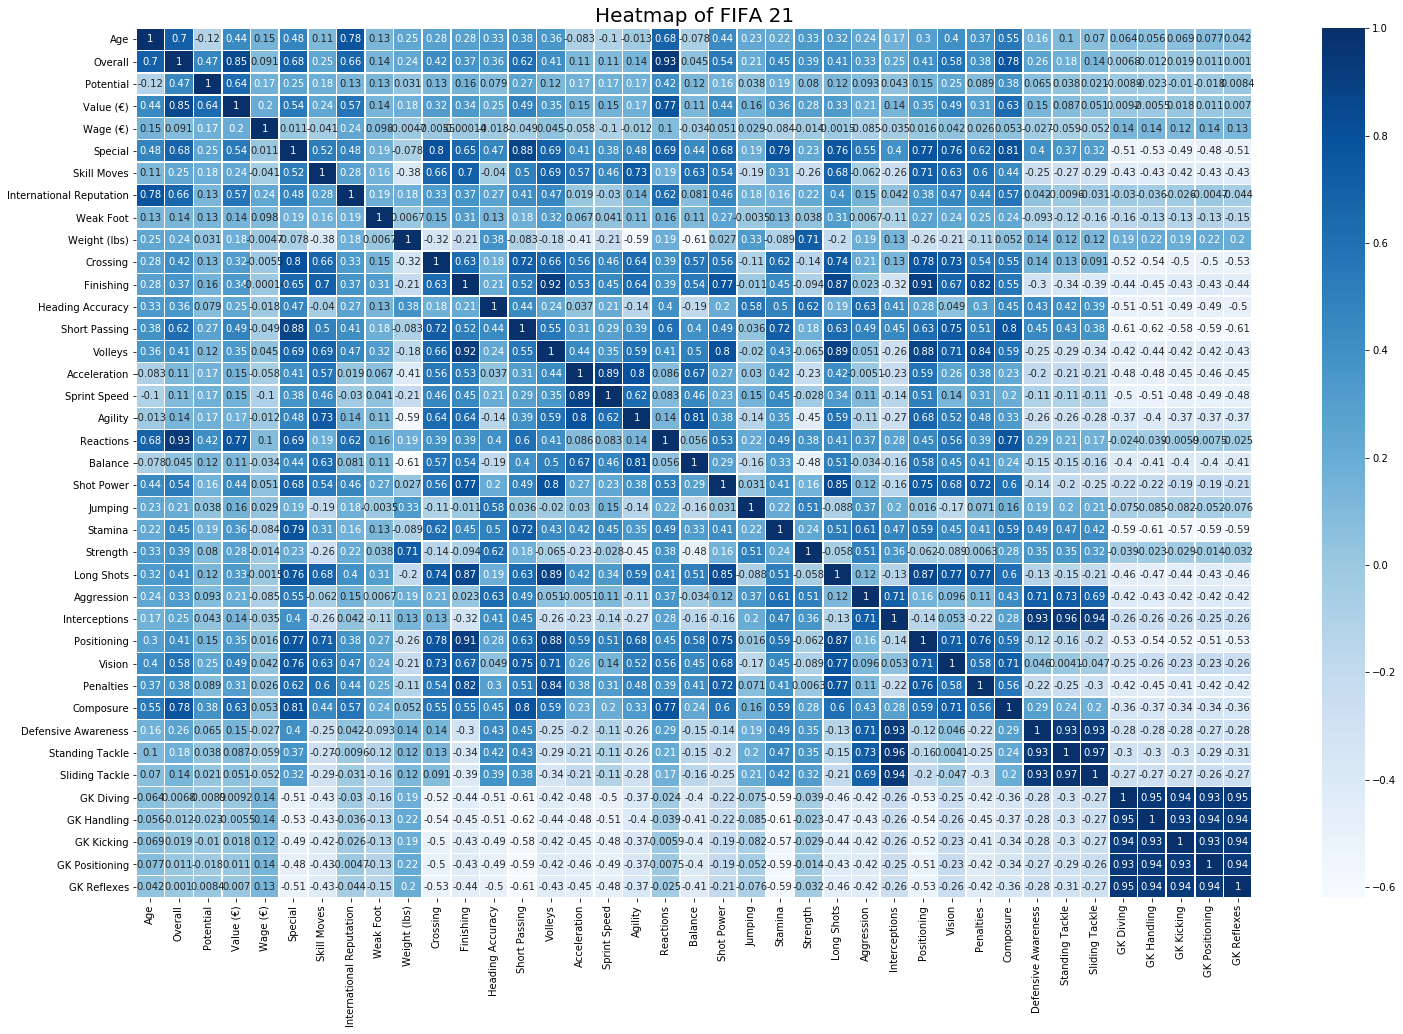

In [19]:
plt.rcParams['figure.figsize'] = (25,16)

hm = sns.heatmap(df[['Age', 'Overall', 'Potential', 'Value (€)', 'Wage (€)', 'Special', 'Preferred Foot', 
                   'Skill Moves', 'International Reputation', 'Weak Foot',
                   'Position', 'Height (ft)', 'Weight (lbs)', 'Crossing', 'Finishing',
                   'Heading Accuracy', 'Short Passing', 'Volleys', 'Acceleration',
                   'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
                   'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
                   'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Defensive Awareness', 'Standing Tackle', 'Sliding Tackle', 'GK Diving',
                    'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']].corr(), 
                     annot = True, linewidths = .5, cmap = 'Blues')

hm.set_title(label = 'Heatmap of FIFA 21', fontsize = 20)

hm;

#### We will have an example to show the correlation between "Acceleration" vs "Sprint Speed, Agility, Balance, Strength"

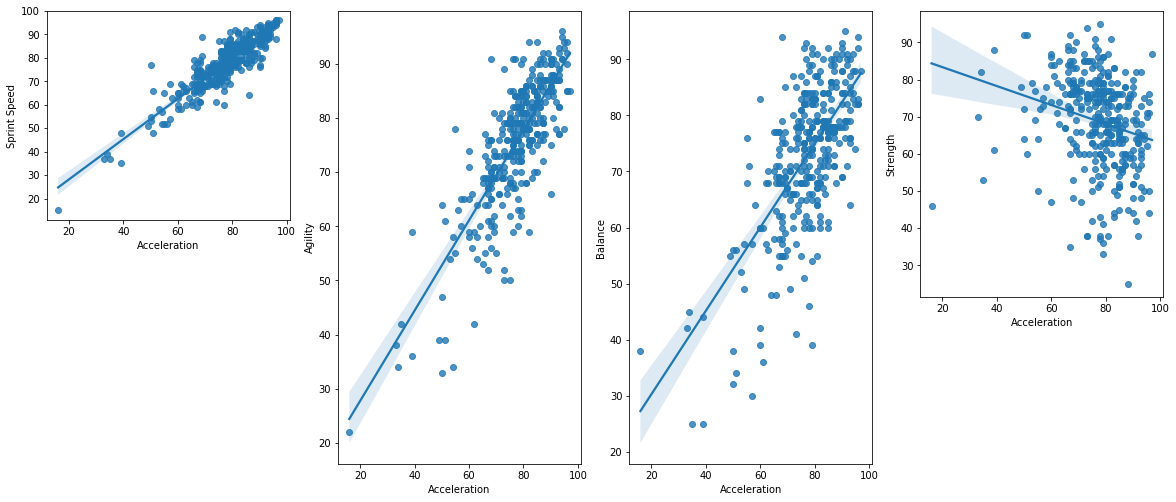

In [20]:
features = ['Sprint Speed', 'Agility', 'Balance', 'Strength']
    
plt.figure(figsize = (20, 20))

plt.subplots_adjust(hspace = 0.4)

for index, features in enumerate(features):
    
    plt.subplot(len(features)/4+1, 4, index + 1)
    
    ax = sns.regplot(x = 'Acceleration', y = features, data = df)

#### Number Of Players Per Position

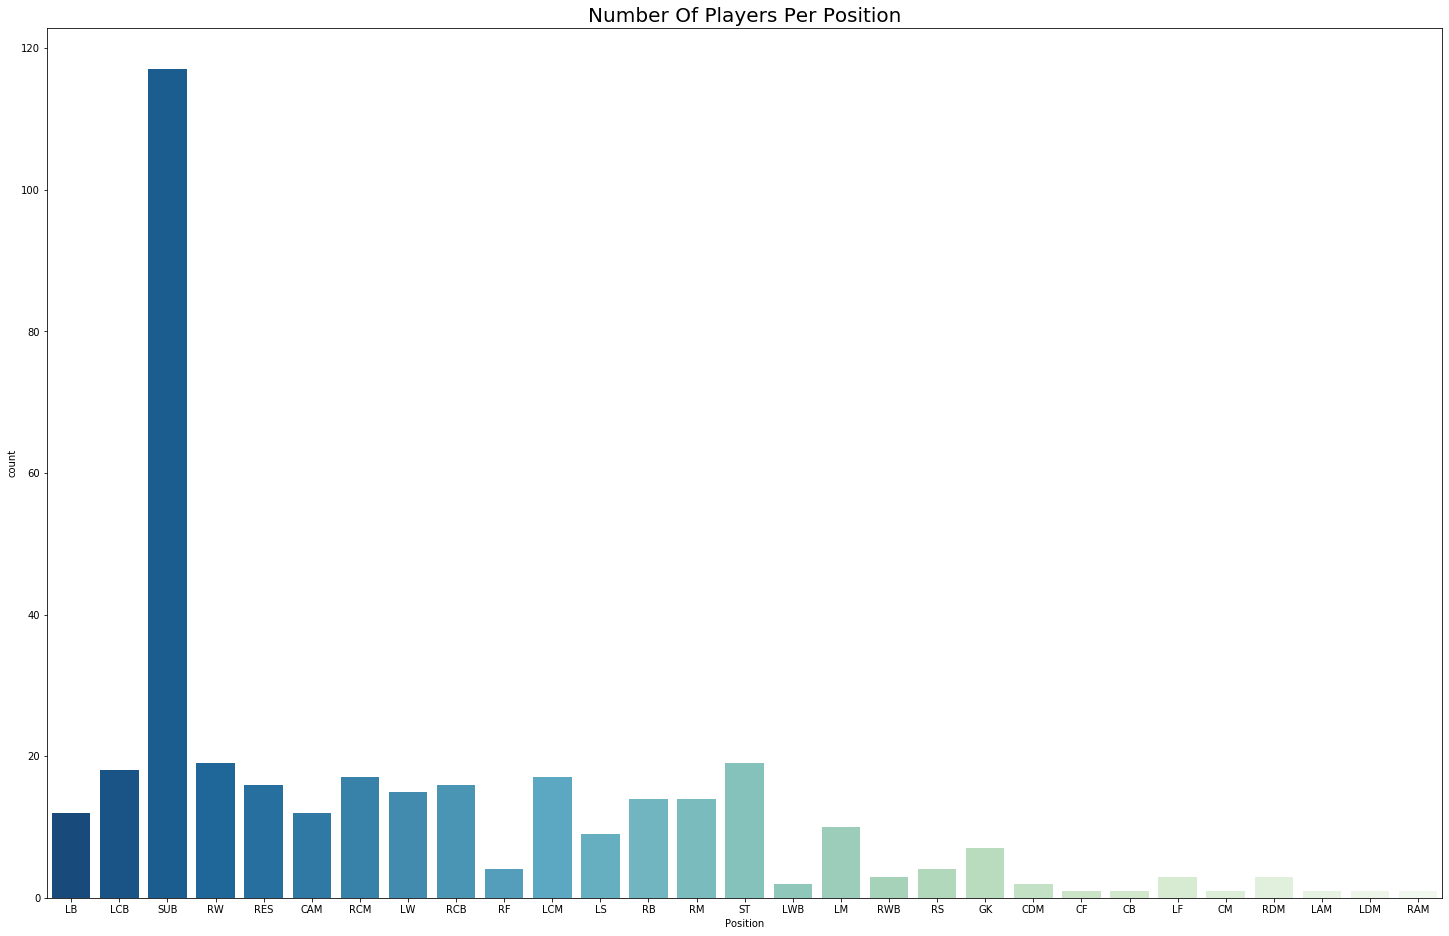

In [21]:
ax = sns.countplot(x = 'Position', data = df, palette = 'GnBu_r');

ax.set_title(label = 'Number Of Players Per Position', fontsize = 20);

#### Histogram: Number Of Players In Different Age Groups

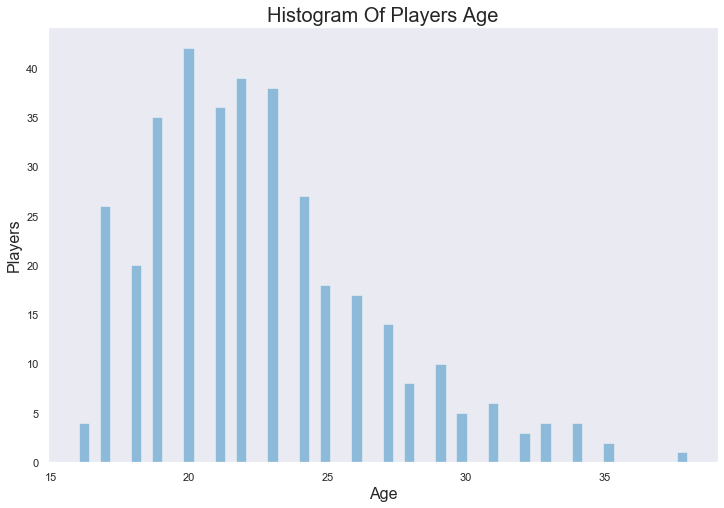

In [22]:
sns.set(style = "dark", palette = "colorblind", color_codes=True)

x = df.Age

plt.figure(figsize = (12,8))

ax = sns.distplot(x, bins = 58, kde = False, color ='b')

ax.set_xlabel(xlabel = "Age", fontsize = 16)

ax.set_ylabel(ylabel = 'Players', fontsize = 16)

ax.set_title(label = 'Histogram Of Players Age', fontsize = 20)

plt.show()

#### Comparison Of My Favorite Clubs In Relation to Age

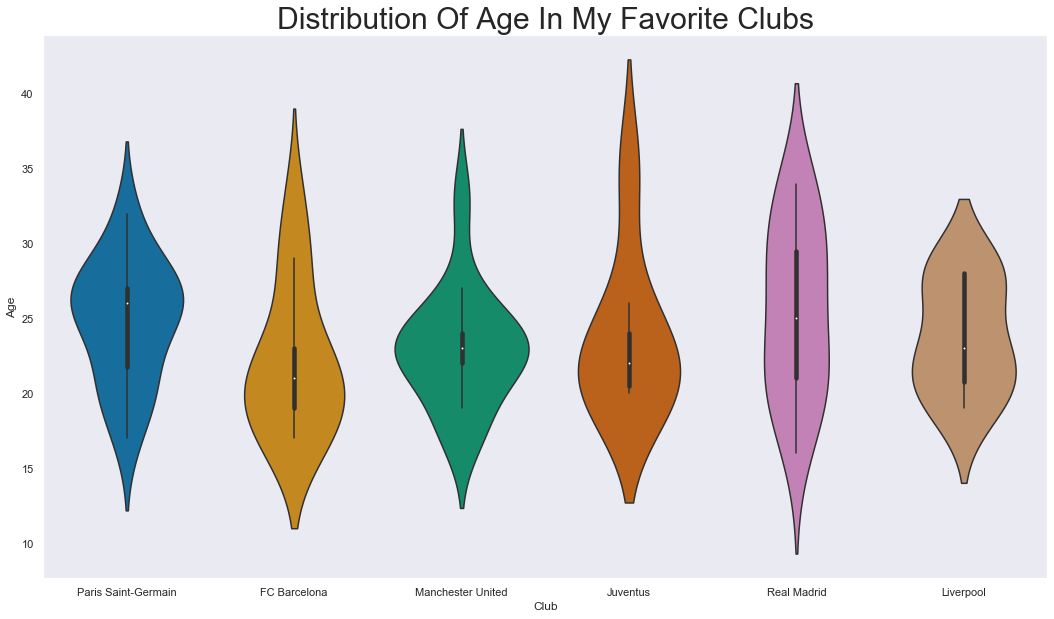

In [23]:
fav_clubs = ['Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Liverpool', 'Manchester United']

df_club = df.loc[df['Club'].isin(fav_clubs), ['Age', 'Club']]

fig, ax = plt.subplots()

fig.set_size_inches(18, 10)

ax = sns.violinplot(x = "Club", y = "Age", data = df_club);

ax.set_title(label = 'Distribution Of Age In My Favorite Clubs', fontsize = 30);

#### PLayers' Overall In My Favorite Clubs

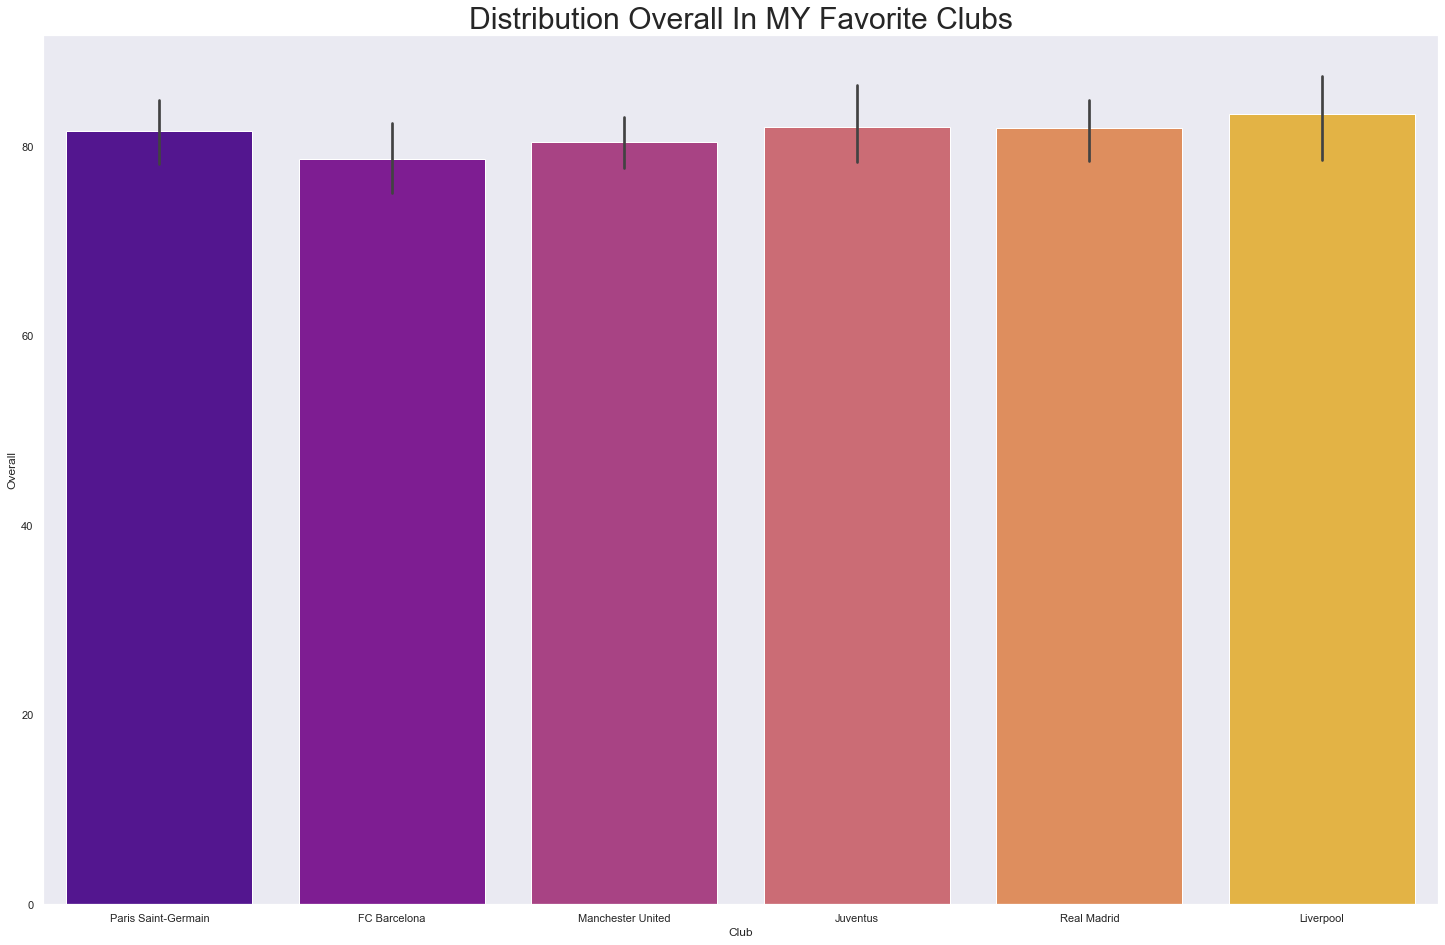

In [24]:
fav_clubs = ['Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Liverpool', 'Manchester United']

df_club = df.loc[df['Club'].isin(fav_clubs), ['Age', 'Club', 'Overall'] ]

ax = sns.barplot(x = df_club['Club'], y = df_club['Overall'], palette = "plasma");

ax.set_title(label = 'Distribution Overall In MY Favorite Clubs', fontsize = 30);

#### What skill sets does a player need to have in order to be good at a particular position?

In [25]:
# Skill Sets

player_features = ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 
                   'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 
                   'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 
                   'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defensive Awareness', 
                   'Standing Tackle', 'Sliding Tackle', 'GK Diving', 'GK Handling', 'GK Kicking',
                    'GK Positioning', 'GK Reflexes']

# Top five features per position

for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    
    print('Position {}: {}, {}, {}, {}, {}'.format(i, *tuple(val.nlargest(5).index)))

Position CAM: Agility, Vision, Short Passing, Composure, Shot Power
Position CB: Heading Accuracy, Standing Tackle, Sprint Speed, Aggression, Sliding Tackle
Position CDM: Stamina, Composure, Standing Tackle, Short Passing, Reactions
Position CF: Heading Accuracy, Reactions, Positioning, Composure, Finishing
Position CM: Stamina, Jumping, Interceptions, Standing Tackle, Reactions
Position GK: GK Reflexes, GK Diving, GK Positioning, GK Kicking, GK Handling
Position LAM: Sprint Speed, Acceleration, Shot Power, Crossing, Finishing
Position LB: Sprint Speed, Acceleration, Stamina, Aggression, Reactions
Position LCB: Standing Tackle, Strength, Defensive Awareness, Aggression, Interceptions
Position LCM: Short Passing, Composure, Stamina, Reactions, Vision
Position LDM: Agility, Acceleration, Sprint Speed, Positioning, Composure
Position LF: Sprint Speed, Acceleration, Agility, Balance, Positioning
Position LM: Sprint Speed, Acceleration, Stamina, Reactions, Positioning
Position LS: Sprint Sp

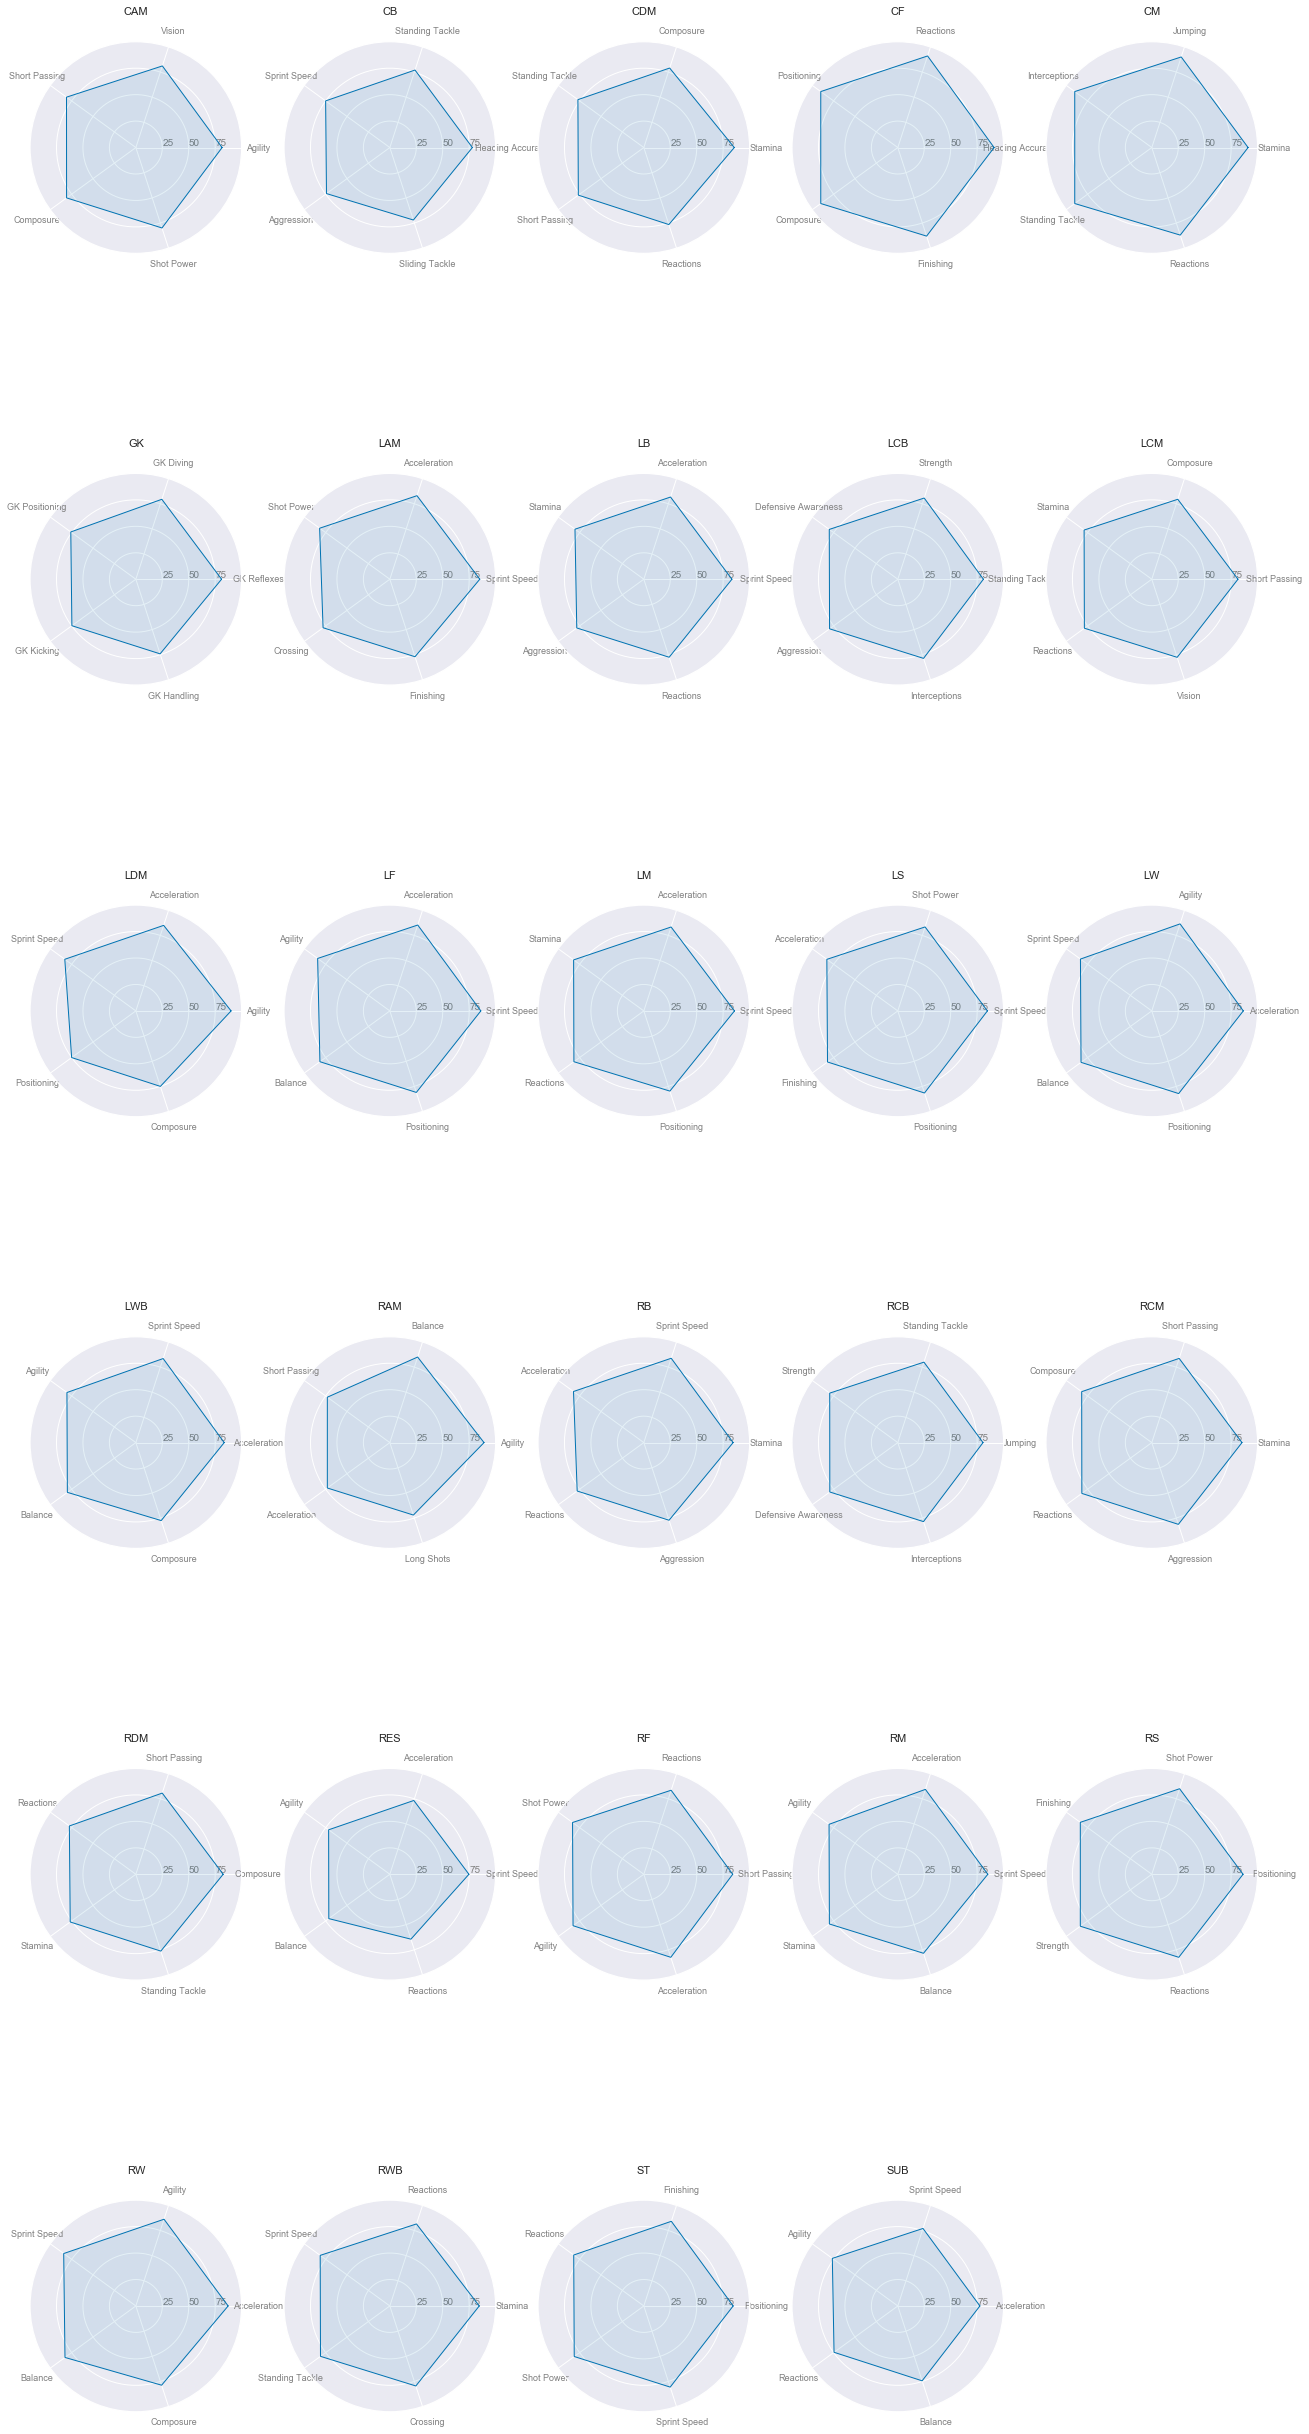

In [26]:
# Comparing top 5 Skills for each postion 

idx = 1

plt.figure(figsize = (22,45))

for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories = top_features.keys()
    
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(6, 5, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color = 'grey', size = 9)

    # Draw ylabels
    ax.set_rlabel_position(0)
    
    plt.yticks([25,50,75], ["25","50","75"], color = "grey", size = 10)
    
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth = 1, linestyle = 'solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha = 0.1)
    
    plt.title(position_name, size=11, y = 1.1)
    
    idx += 1 

Based on the above graphs, we can tell what skill sets a player needs to have in order to be good at a particular position. Moreover, we can use top five skill sets to compare one player to another player if we want to use these information to have the best pick for a particular position.

For example, Centre Backs (CB) are high on Strength and are typically strong in Aggression. Right and Left Wingers (RW & LW), and Left Forwards (LW) are very agile, while Left and Right Midfielders (LM & RM) have great Acceleration.

#### Left-Footed vs Right-Footed

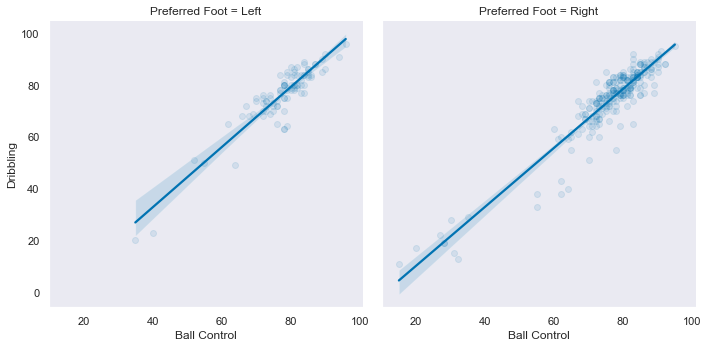

In [27]:
sns.lmplot(x = 'Ball Control', y = 'Dribbling', data = df, scatter_kws = {'alpha': 0.1}, col = 'Preferred Foot');

#### How do "Dribbling and Crossing" skills affect a player scoring?

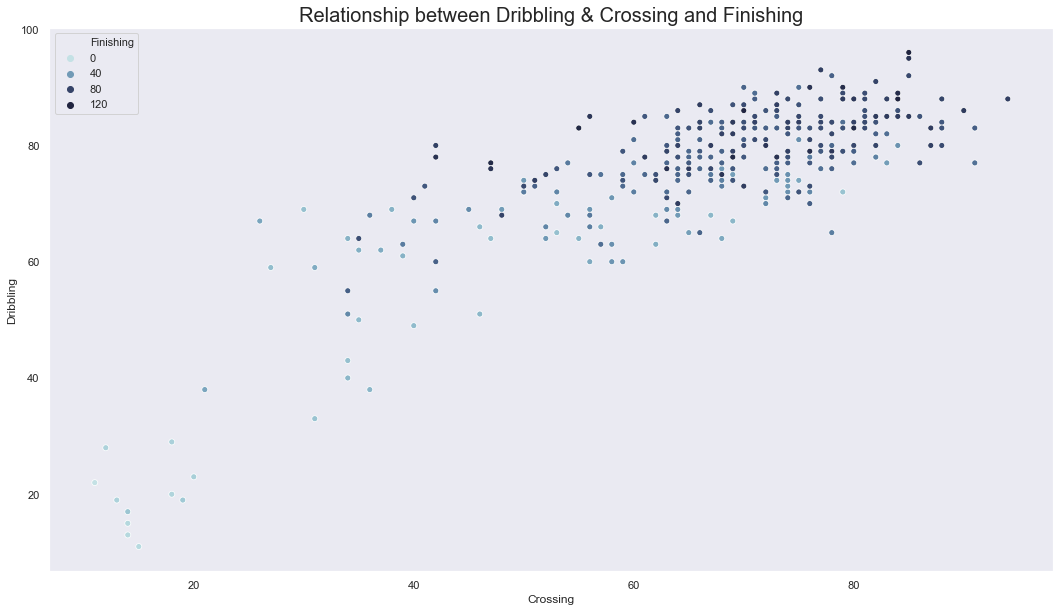

In [28]:
plt.figure(figsize = (18,10))

cmap = sns.cubehelix_palette(rot = -.2, as_cmap=True)

ax = sns.scatterplot(x = 'Crossing', y = 'Dribbling', hue = 'Finishing', palette = cmap, sizes=(10, 10), data = df)

ax.set_title(label = 'Relationship between Dribbling & Crossing and Finishing', fontsize = 20);

#### In order to see how a player performs his role throughout the entire game. We will see how is Sprint Speed affected by Age and Stamina?

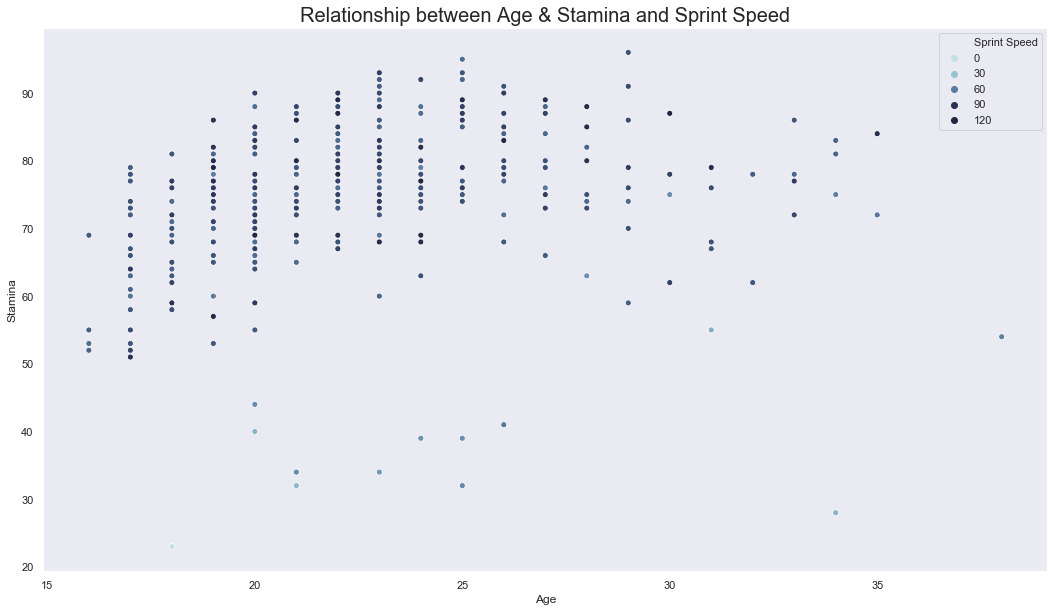

In [29]:
plt.figure(figsize = (18,10))

cmap = sns.cubehelix_palette(rot = -.2, as_cmap=True)

ax = sns.scatterplot(x = 'Age', y = 'Stamina', hue = 'Sprint Speed', palette = cmap, sizes=(10, 10), data = df)
 
ax.set_title(label = 'Relationship between Age & Stamina and Sprint Speed', fontsize = 20);

#### Top 10 Countries Overall Boxplot

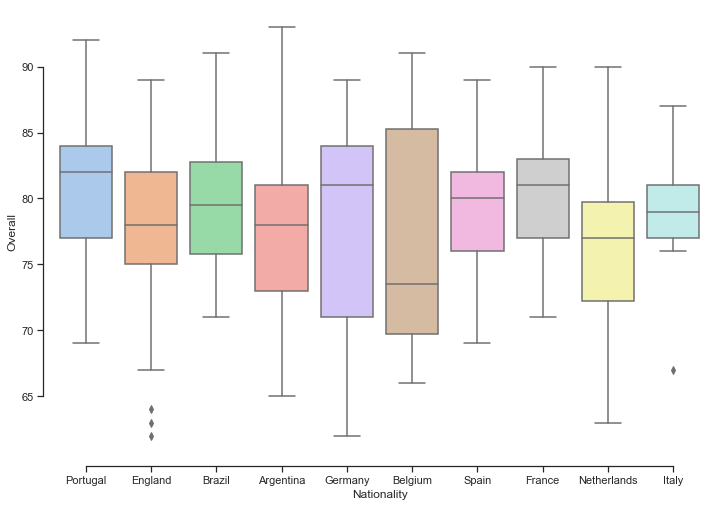

In [30]:
sns.set(style = "ticks", palette = "pastel")

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize = a4_dims)

top10 = list(df['Nationality'].value_counts().head(10).index)

box_overall = sns.boxplot(data = df.loc[df['Nationality'].isin(top10)], y = 'Overall', x = 'Nationality')

sns.despine(offset = 10, trim = True)

#### Top 10 Countries Potential Boxplot

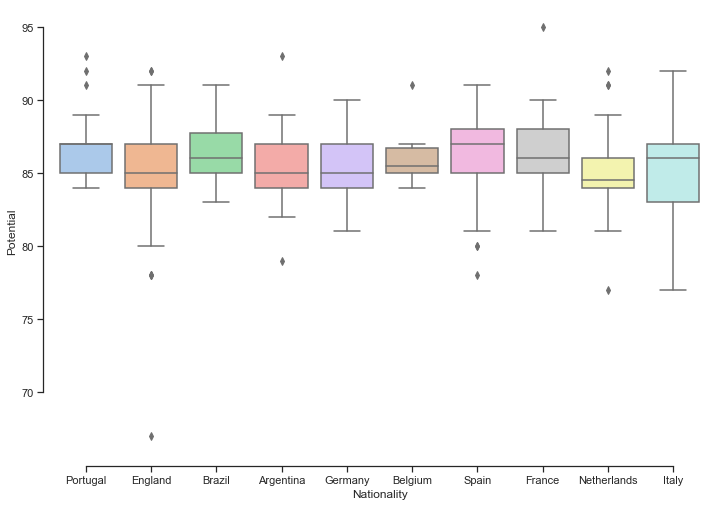

In [31]:
sns.set(style = "ticks", palette = "pastel")

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize = a4_dims)

box_potential = sns.boxplot(data = df.loc[df['Nationality'].isin(top10)], y = 'Potential', x = 'Nationality')

sns.despine(offset = 10, trim = True)

#### Top 10 Clubs Overall Boxplot

In [32]:
df_top10clubs = df[["Name", "Overall", "Club"]]

topclubs = df_top10clubs.groupby("Club", as_index= False).median().sort_values("Overall", ascending = False).head(10)

topclubs = list(topclubs["Club"])

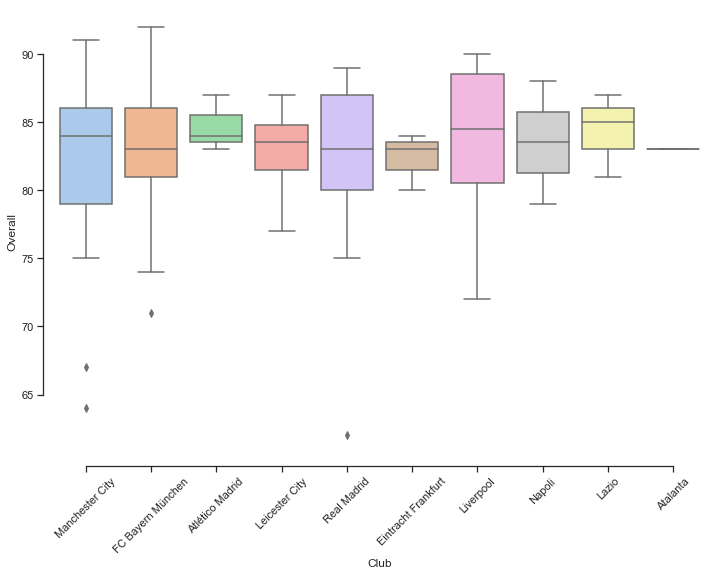

In [33]:
sns.set(style = "ticks", palette = "pastel")

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize = a4_dims)

box_wage = sns.boxplot(data = df.loc[df['Club'].isin(topclubs)], y = 'Overall', x = 'Club')

sns.despine(offset = 10, trim = True)

a = plt.setp(ax.get_xticklabels(), rotation = 45)

#### Top 10 Clubs Potential boxplot

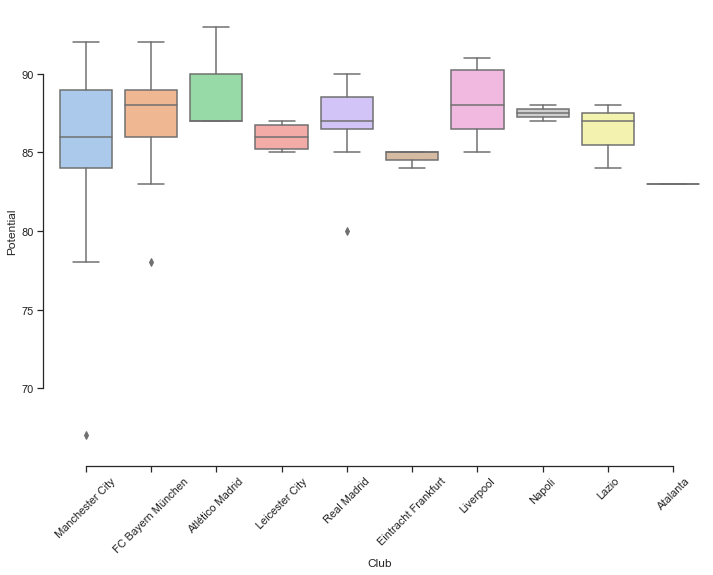

In [34]:
sns.set(style = "ticks", palette = "pastel")

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize = a4_dims)

box_wage = sns.boxplot(data = df.loc[df['Club'].isin(topclubs)], y = 'Potential', x = 'Club')

sns.despine(offset = 10, trim = True)

a = plt.setp(ax.get_xticklabels(), rotation = 45)

#### Relationship between Overall & Potential vs Age

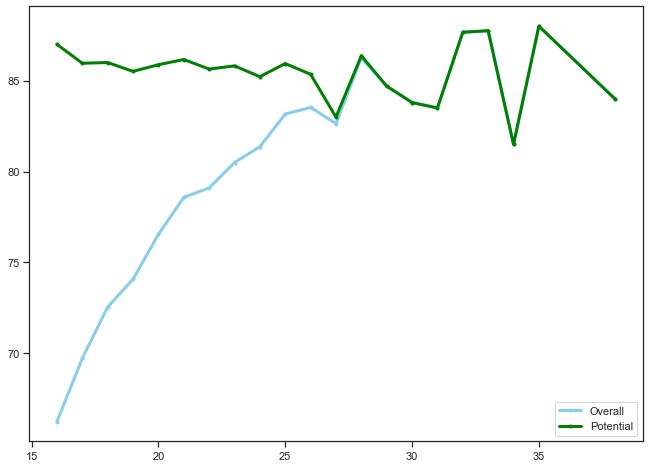

In [35]:
overall = pd.DataFrame(df.groupby(["Age"])['Overall'].mean())

potential = pd.DataFrame(df.groupby(["Age"])['Potential'].mean())

merged = pd.merge(overall, potential, on = 'Age', how = 'inner')

merged['Age']= merged.index

fig, ax = plt.subplots(figsize = (11, 8))

merged.reset_index(drop = True, inplace = True)

p = plt.plot('Age', 'Overall', data = merged, marker = '.', color = 'skyblue', linewidth = 3, label ="Overall" )

p = plt.plot('Age', 'Potential', data = merged, marker = '.', color = 'green', linewidth = 3, label = "Potential")

p = plt.legend()

On basic visual analysis of data, it was noticed that a few of the older players had already reached their potential rating. These values were plotted as a line graph against the age as the line graph would show a clear trend of changes in these ratings and also if the ratings met at a certain point.

As we can see from the above graph, we can tell that Overall and Potential values meet approximately at around age 28 and continue to match as the age goes up. Another interesting tend that was observed is that while overall increases as age increases and peaks between the years 29 to 33, the potential rating actually decreases as age progresses till it meets the potential and then plateaus. There are very few players above the age of 37 and have been ignored as outliers. This analysis can be useful for while creating a squad as the age can be used as a factor in deciding whether a player should be retained or dropped. A way that this can be further enhanced is to find the trend of each player attribute across ages to determine the age at which each player attribute peaks.